LACOUX Coline<br/>
SAAF Yami

# <font color='black' style="text-decoration:underline">TME2 - Estimation de Densité

In [2]:
#import des librairies
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

Liste des types de POI : furniture_store, laundry, bakery, cafe, home_goods_store, clothing_store, atm, lodging, night_club, convenience_store, restaurant, bar


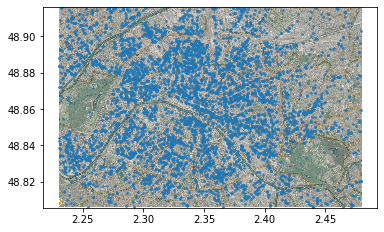

In [7]:
plt.ion()
parismap = mpimg.imread('data/paris-48.806-2.23--48.916-2.48.jpg')

## coordonnees GPS de la carte
xmin,xmax = 2.23,2.48   ## coord_x min et max
ymin,ymax = 48.806,48.916 ## coord_y min et max

def show_map():
    plt.imshow(parismap,extent=[xmin,xmax,ymin,ymax],aspect=1.5)
    ## extent pour controler l'echelle du plan

poidata = pickle.load(open("data/poi-paris.pkl","rb"))

## liste des types de point of interest (poi)
print("Liste des types de POI :" , ", ".join(poidata.keys()))

## Choix d'un poi
typepoi = "bar"

## Creation de la matrice des coordonnees des POI
geo_mat = np.zeros((len(poidata[typepoi]),2))
for i,(k,v) in enumerate(poidata[typepoi].items()):
    geo_mat[i,:]=v[0]

## Affichage brut des poi
show_map()

## alpha permet de regler la transparence, s la taille
plt.scatter(geo_mat[:,1],geo_mat[:,0],alpha=0.8,s=3)
plt.show()

In [36]:
def afficher(prediction,steps):
    # discretisation pour l'affichage des modeles d'estimation de densite
    xx,yy = np.meshgrid(np.linspace(xmin,xmax,steps),np.linspace(ymin,ymax,steps))
    grid = np.c_[xx.ravel(),yy.ravel()]

    res = prediction.reshape(steps,steps) 
    plt.figure()
    show_map()
    plt.imshow(res,extent=[xmin,xmax,ymin,ymax],interpolation='none',\
            alpha=0.3,origin = "lower")
    plt.colorbar()
    #plt.scatter(geo_mat[:,1],geo_mat[:,0],alpha=0.3)

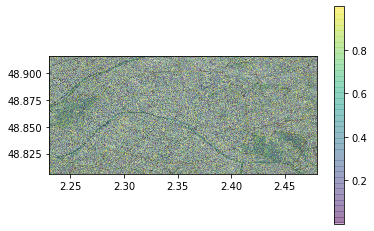

In [37]:
steps = 1000
afficher(np.random.random((steps,steps)),steps)

# Méthode des histogrammes